In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,country,description,designation,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,points
0,Australia,"Possibly a little sweet, this is a soft, easyg...",NaN,5.0,Australia Other,South Eastern Australia,NaN,Joe Czerwinski,@JoeCz,Banrock Station 2006 Chardonnay (South Eastern...,Chardonnay,Banrock Station,83
1,France,"A soft, almost off dry wine that is full in th...",Réserve,12.0,Rhône Valley,Côtes du Rhône,NaN,Roger Voss,@vossroger,Cellier des Dauphins 2015 Réserve Rosé (Côtes ...,Rosé,Cellier des Dauphins,85
2,Spain,Generic white-fruit aromas of peach and apple ...,Estate Grown & Bottled,9.0,Northern Spain,Rueda,NaN,Michael Schachner,@wineschach,Esperanza 2013 Estate Grown & Bottled Verdejo-...,Verdejo-Viura,Esperanza,86
3,US,This is the winery's best Nebula in years. Whi...,Nebula,29.0,California,Paso Robles,Central Coast,NaN,NaN,Midnight 2010 Nebula Cabernet Sauvignon (Paso ...,Cabernet Sauvignon,Midnight,87
4,US,This is a very rich Pinot whose primary virtue...,Wiley Vineyard,40.0,California,Anderson Valley,NaN,NaN,NaN,Harrington 2006 Wiley Vineyard Pinot Noir (And...,Pinot Noir,Harrington,88


In [ ]:
df.columns

Index(['country', 'designation', 'price', 'province', 'region_1',
       'taster_name', 'title', 'variety', 'winery', 'points'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103976 entries, 0 to 103975
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                103925 non-null  object 
 1   description            103976 non-null  object 
 2   designation            73967 non-null   object 
 3   price                  96781 non-null   float64
 4   province               103925 non-null  object 
 5   region_1               86954 non-null   object 
 6   region_2               40408 non-null   object 
 7   taster_name            83005 non-null   object 
 8   taster_twitter_handle  78994 non-null   object 
 9   title                  103976 non-null  object 
 10  variety                103975 non-null  object 
 11  winery                 103976 non-null  object 
 12  points                 103976 non-null  int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 10.3+ MB


In [ ]:
df.dtypes

country                   object
description               object
designation               object
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
points                     int64
dtype: object

In [ ]:
# twitter id와 taster name이 일대일 대응하는지 확인
df.groupby(['taster_name', 'taster_twitter_handle']).size()

taster_name        taster_twitter_handle
Anne Krebiehl MW   @AnneInVino               2937
Christina Pickard  @winewchristina              6
Fiona Adams        @bkfiona                    23
Jeff Jenssen       @worldwineguys             394
Jim Gordon         @gordone_cellars          3279
Joe Czerwinski     @JoeCz                    4089
Kerin O’Keefe      @kerinokeefe              8673
Lauren Buzzeo      @laurbuzz                 1428
Matt Kettmann      @mattkettmann             5109
Michael Schachner  @wineschach              12026
Mike DeSimone      @worldwineguys             425
Paul Gregutt       @paulgwine                7673
Roger Voss         @vossroger               20536
Sean P. Sullivan   @wawinereport             3950
Susan Kostrzewa    @suskostrzewa              855
Virginie Boone     @vboone                   7591
dtype: int64

In [ ]:
print(df.groupby('country').size().sort_values(ascending=False)[:10])
print("\n", df.groupby('designation').size().sort_values(ascending=False)[:10])
print("\n", df.groupby('province').size().sort_values(ascending=False)[:10])
print("\n", df.groupby('region_1').size().sort_values(ascending=False)[:10])
print("\n", df.groupby('taster_name').size().sort_values(ascending=False)[:10])
print("\n", df.groupby('title').size().sort_values(ascending=False)[:10])
print("\n", df.groupby('variety').size().sort_values(ascending=False)[:20])
print("\n", df.groupby('winery').size().sort_values(ascending=False)[:20])

country
US           43578
France       17749
Italy        15659
Spain         5221
Portugal      4593
Chile         3589
Argentina     3037
Austria       2654
Australia     1859
Germany       1755
dtype: int64

 designation
Reserve           1634
Estate            1041
Reserva            988
Riserva            523
Estate Grown       489
Brut               417
Dry                329
Barrel sample      298
Estate Bottled     273
Crianza            273
dtype: int64

 province
California          28941
Washington           6916
Bordeaux             4776
Tuscany              4729
Oregon               4313
Burgundy             3236
Northern Spain       3012
Piedmont             2991
Mendoza Province     2621
Veneto               2184
dtype: int64

 region_1
Napa Valley             3599
Columbia Valley (WA)    3296
Russian River Valley    2459
California              2067
Paso Robles             1917
Mendoza                 1850
Willamette Valley       1836
Alsace                  1744
Champ

**Cleaness Issue**
- 중복된 데이터가 존재하고, description과 같은 변수만 중복된 경우에 대해서는 추가적인 확인이 필요할 것임.
- taster_name 칼럼과 taster_twitter_handle 칼럼이 1대1 대응되고 있음.
- 결측치를 포함하고 있는 행들이 있고, 그 중 region_2의 경우 결측치의 비율이 상당히 큼.

### 중복된 데이터 제거

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df[df['description'].duplicated()].index

Int64Index([ 24798,  31067,  33270,  38558,  47705,  48829,  49512,  55976,
             63279,  68952,  70422,  79643,  85389,  87262,  90848,  95434,
             95441,  97075,  98038,  98695, 101386],
           dtype='int64')

In [ ]:
# 중복된 데이터 각각 확인
df[df['description'] == df.loc[101386, 'description']]

,country,description,designation,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,points
33843,Italy,"Aromas of white flower, green pear and flinty ...",NaN,19.0,Southern Italy,Campi Flegrei,NaN,Kerin O’Keefe,@kerinokeefe,Cantine Farro 2013 Falanghina (Campi Flegrei),Falanghina,Cantine Farro,87
101386,Italy,"Aromas of white flower, green pear and flinty ...",Le Cigliate,29.0,Southern Italy,Campi Flegrei,NaN,Kerin O’Keefe,@kerinokeefe,Cantine Farro 2013 Le Cigliate Falanghina (Cam...,Falanghina,Cantine Farro,88


In [ ]:
# 오기로 판단되는 데이터 제거
df.drop(index=[24798, 24231], inplace=True)

### taster_twitter_handle 칼럼 삭제

In [ ]:
df.drop(columns=['taster_twitter_handle'], inplace=True)

### 결측치 제거

In [ ]:
df.isna().sum()/df.shape[0]*100

country         0.049196
description     0.000000
designation    28.854452
price           6.976601
province        0.049196
region_1       16.343306
region_2       61.043979
taster_name    20.624379
title           0.000000
variety         0.001025
winery          0.000000
points          0.000000
dtype: float64

region_2에 대해서는 결측치 비율이 61%이므로, drop하고 추후에 region_1 칼럼에 인사이트가 발견될 경우 재고려하고자 함. 그리고 designation, price, region_1, taster_name과 같은 칼럼에 대해서는 결측치를 포함하고 있는 행에 발견되는 특징이 있는지 확인하고, 그렇지 않다면 해당되는 행을 삭제하였음.

In [ ]:
df.drop(columns=['region_2'], inplace=True)

## 결측치 추정

In [ ]:
print(df.groupby('country').size().sort_values(ascending=False)[:10])
print("\n", df.groupby('designation').size().sort_values(ascending=False)[:10])
print("\n", df.groupby('province').size().sort_values(ascending=False)[:10])
print("\n", df.groupby('region_1').size().sort_values(ascending=False)[:10])
print("\n", df.groupby('taster_name').size().sort_values(ascending=False)[:10])
print("\n", df.groupby('title').size().sort_values(ascending=False)[:10])
print("\n", df.groupby('variety').size().sort_values(ascending=False)[:20])
print("\n", df.groupby('winery').size().sort_values(ascending=False)[:20])

country
US           40982
France       16642
Italy        14604
Spain         4890
Portugal      4323
Chile         3401
Argentina     2875
Austria       2447
Australia     1777
Germany       1638
dtype: int64

 designation
Reserve           1544
Estate             977
Reserva            939
Riserva            488
Estate Grown       455
Brut               392
Dry                305
Barrel sample      292
Estate Bottled     262
Crianza            255
dtype: int64

 province
California          27286
Washington           6486
Bordeaux             4525
Tuscany              4380
Oregon               4028
Burgundy             3040
Northern Spain       2825
Piedmont             2814
Mendoza Province     2475
Veneto               2038
dtype: int64

 region_1
Napa Valley             3406
Columbia Valley (WA)    3088
Russian River Valley    2316
California              1977
Paso Robles             1777
Mendoza                 1756
Willamette Valley       1707
Alsace                  1617
Champ

In [ ]:
region1_null = df[df.region_1.isna()].groupby('country').size().sort_values(ascending=False)
region1_null_index = region1_null.index
region1_null

country
Portugal                  4323
Chile                     3401
Austria                   2447
Germany                   1638
New Zealand               1044
South Africa              1040
Israel                     376
Greece                     352
US                         208
Bulgaria                   106
Hungary                    103
Romania                     86
Uruguay                     77
Turkey                      69
Slovenia                    67
Georgia                     63
Mexico                      61
France                      56
Croatia                     56
England                     50
Moldova                     48
Argentina                   42
Brazil                      38
Lebanon                     27
Italy                       20
Morocco                     18
Ukraine                     11
Peru                        11
Macedonia                   10
Serbia                       7
Czech Republic               7
Cyprus                       7


In [ ]:
df.groupby('country').size()[region1_null_index]

country
Portugal                   4323
Chile                      3401
Austria                    2447
Germany                    1638
New Zealand                1044
South Africa               1040
Israel                      376
Greece                      352
US                        40982
Bulgaria                    106
Hungary                     103
Romania                      86
Uruguay                      77
Turkey                       69
Slovenia                     67
Georgia                      63
Mexico                       61
France                    16642
Croatia                      56
England                      50
Moldova                      48
Argentina                  2875
Brazil                       38
Lebanon                      27
Italy                     14604
Morocco                      18
Ukraine                      11
Peru                         11
Macedonia                    10
Serbia                        7
Czech Republic                7


region_1 칼럼의 경우 특정 country에 속하는 행들의 region_1 데이터가 모두 결측치인 것을 확인할 수 있다. 그 예로는 포르투갈, 오스트리아, 칠레 등이 있다. 이에 대해서는 결측치를 drop 시키는 대신 region1에 country name 자체를 대입하는 방법을 선택할 수 있다.

In [ ]:
for country_name in region1_null_index:
    if df[df.country == country_name].size == df.query(f'country == "{country_name}" and region_1.isna()').size:
        idx = df.query(f'country == "{country_name}" and region_1.isna()').index
        df.loc[idx, 'region_1'] = country_name

결측치를 제거했을 때에 데이터의 경향성을 다소 훼손할 것으로 생각되기 때문에, 결측치 데이터를 하나씩 확인하여 추정할 수 있는 값을 식별해보고자 한다.

In [ ]:
df[df.variety.isna()]

,country,description,designation,price,province,region_1,taster_name,title,variety,winery,points
63920,Chile,"A chalky, dusty mouthfeel nicely balances this...",NaN,17.0,Maipo Valley,Chile,NaN,Carmen 1999 (Maipo Valley),NaN,Carmen,88


In [ ]:
df[df.winery == "Carmen"]

,country,description,designation,price,province,region_1,taster_name,title,variety,winery,points
4782,Chile,"Berry, olive, spice and herbal aromas are typi...",Gran Reserva Maipo Alto,15.0,Maipo Valley,Chile,Michael Schachner,Carmen 2012 Gran Reserva Maipo Alto Cabernet S...,Cabernet Sauvignon,Carmen,86
5103,Chile,Merlot from Chile is coming up fast and this s...,Reserve,15.0,Rapel Valley,Chile,NaN,Carmen 1998 Reserve Merlot (Rapel Valley),Merlot,Carmen,89
8266,Chile,"This smells a bit green, with aromas of herb, ...",Gran Reserva Maipo Alto,15.0,Maipo Valley,Chile,Michael Schachner,Carmen 2009 Gran Reserva Maipo Alto Petite Sir...,Petite Sirah,Carmen,87
9001,Chile,"Cheesy aromas of leather, licorice and black f...",Gran Reserva El Acacio Vineyard,15.0,Maipo Valley,Chile,Michael Schachner,Carmen 2012 Gran Reserva El Acacio Vineyard Pe...,Petite Sirah,Carmen,87
9037,Chile,"Varietally correct, with familiar prickly arom...",NaN,9.0,Curicó Valley,Chile,Michael Schachner,Carmen 2008 Sauvignon Blanc (Curicó Valley),Sauvignon Blanc,Carmen,87
12951,Chile,"Dry, leafy and herbal, with cherry, berry and ...",Reserva,20.0,Maipo Valley,Chile,Michael Schachner,Carmen 2007 Reserva Carmenère-Cabernet Sauvign...,Carmenère-Cabernet Sauvignon,Carmen,88
18768,Chile,There's a sea of basic Cabernet that comes out...,NaN,10.0,Maipo Valley,Chile,Michael Schachner,Carmen 2007 Cabernet Sauvignon (Maipo Valley),Cabernet Sauvignon,Carmen,83
21950,Chile,"Candied but also peppery and herbal, and witho...",Reserva,16.0,Casablanca Valley,Chile,Michael Schachner,Carmen 2006 Reserva Merlot (Casablanca Valley),Merlot,Carmen,85
25840,Chile,"Wet clay, tomato paste, oregano and carob arom...",Gran Reserva Maipo Alto,15.0,Maipo Valley,Chile,Michael Schachner,Carmen 2010 Gran Reserva Maipo Alto Merlot (Ma...,Merlot,Carmen,83
26753,Chile,Dusty apple aromas are less citrusy than ideal...,NaN,10.0,Curicó Valley,Chile,Michael Schachner,Carmen 2009 Sauvignon Blanc (Curicó Valley),Sauvignon Blanc,Carmen,84


In [ ]:
# 모두 동일한 taster에게 평가를 받은 것으로 보이므로 결측치 추정
index = df[df.winery == "Carmen"].index
df.loc[index, 'taster_name'].fillna('Michael Schachner', inplace=True)

In [ ]:
# 결측치의 비율이 과도하게 높은 행들 삭제
index = df[df.isna().sum(axis=1) >= 3].index
df.drop(index=index, inplace=True)

In [ ]:
df.isna().sum()/df.shape[0]*100

country         0.000000
description     0.000000
designation    28.598629
price           6.637369
province        0.000000
region_1        0.335522
taster_name    20.343344
title           0.000000
variety         0.000000
winery          0.000000
points          0.000000
dtype: float64

# EDA

In [ ]:
df.head(3)

,country,description,designation,price,province,region_1,taster_name,title,variety,winery,points
0,Australia,"Possibly a little sweet, this is a soft, easyg...",NaN,5.0,Australia Other,South Eastern Australia,Joe Czerwinski,Banrock Station 2006 Chardonnay (South Eastern...,Chardonnay,Banrock Station,83
1,France,"A soft, almost off dry wine that is full in th...",Réserve,12.0,Rhône Valley,Côtes du Rhône,Roger Voss,Cellier des Dauphins 2015 Réserve Rosé (Côtes ...,Rosé,Cellier des Dauphins,85
2,Spain,Generic white-fruit aromas of peach and apple ...,Estate Grown & Bottled,9.0,Northern Spain,Rueda,Michael Schachner,Esperanza 2013 Estate Grown & Bottled Verdejo-...,Verdejo-Viura,Esperanza,86


### Univariate Visualization

In [ ]:
def countplot_func(data, column, num=20):
    index = data.groupby(column).size().sort_values(ascending=False).index[:num]
    sns.countplot(data=data, y=column, order=index, color='pink');

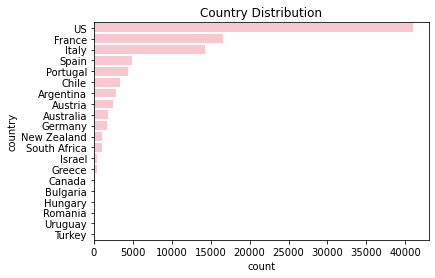

In [ ]:
countplot_func(df, 'country')
plt.title('Country Distribution');

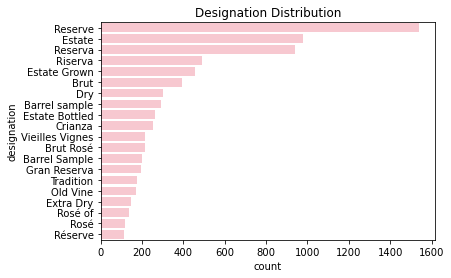

In [ ]:
countplot_func(df, 'designation')
plt.title("Designation Distribution");

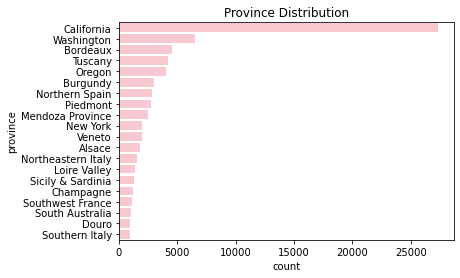

In [ ]:
countplot_func(df, 'province')
plt.title("Province Distribution");

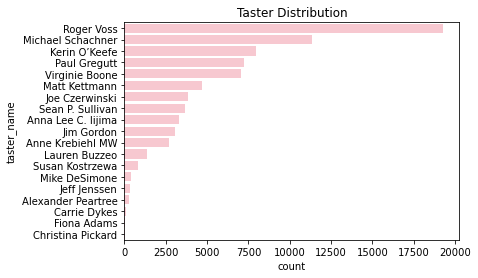

In [ ]:
countplot_func(df, 'taster_name')
plt.title("Taster Distribution");

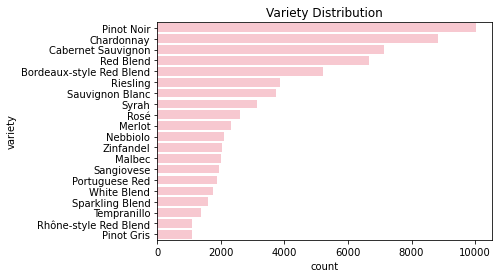

In [ ]:
countplot_func(df, 'variety')
plt.title("Variety Distribution");

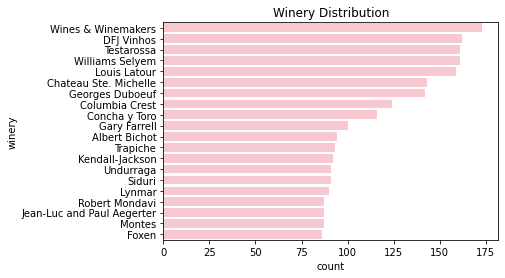

In [ ]:
countplot_func(df, 'winery')
plt.title("Winery Distribution");

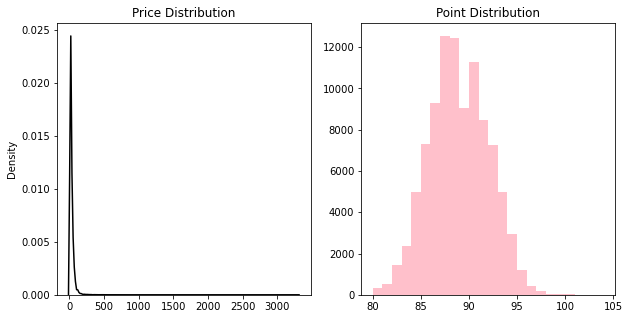

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.distplot(x=df.price, hist=False, color='black')
plt.title("Price Distribution")

plt.subplot(1, 2, 2)
bins=np.arange(df.points.min(), df.points.max()+5, 1)
plt.hist(x=df.points, color='pink', bins=bins)
plt.title("Point Distribution");

분포에서 특이하게 포착되는 점은 극명하게 right-skewed된 형태를 보이고 있는 가격 분포와, province의 데이터가 캘리포니아에 매우 집중되어 있는 것이다. 이 외에도 taster와 country 역시 일부 카테고리에 집중되는 경향성이 강하게 포착되므로 이를 추후에 분석해도 좋을 것으로 보인다. 위의 그래프의 집중된 경향성을 분석할 때에 x축의 척도를 유의해서 확인해야 한다.

price의 경우 right-skewed 형태가 극명하게 확인되는 것을 볼 수 있다. 나머지 값들이 이상치일 수 있다는 가정 하에 아래와 같이 확인 작업을 수행했으나, 전체 약 10만 개의 데이터 중 7000개 가량의 데이터가 IQR 방식을 이용할 경우 이상치로 포함되기 때문에, 이상치 제거는 수행하지 않기로 결정하였다.


In [ ]:
# points 이상치 확인
cut = df.price.quantile(0.75) + (df.price.quantile(0.75)-df.price.quantile(0.25))*1.25
index = df.query(f'price > {cut}').index
index

Int64Index([    36,     38,     39,     40,     50,     66,     77,     90,
               122,    131,
            ...
            103729, 103743, 103765, 103823, 103831, 103892, 103933, 103937,
            103956, 103961],
           dtype='int64', length=6910)

In [ ]:
df.shape

(97162, 11)

더불어, 분석을 진행함에 따라 description 칼럼을 활용하지 않을 것으로 예상되므로 삭제해주기로 결정하였다.

In [ ]:
# description이 categorical하게 해석되지 않음을 확인
df.groupby('description').size().sort_values(ascending=False)[:2]

description
Sleek by Amarone standards, this opens with aromas of ripe black cherry, ground pepper, raisin and a whiff of blue flower. On the palate, finely woven tannins support raspberry jam, black pepper, cocoa and a cinnamon note.    2
Subtle aromas of dark berry, tilled earth and baking spice lead the nose. The ripe, juicy palate doles out mature plum, cassis, anise and black pepper alongside round, solid tannins. Drink through 2018.                        2
dtype: int64

In [ ]:
df.drop(columns='description', inplace=True)

### Bivariate Visualization

In [ ]:
df.head(3)

,country,designation,price,province,region_1,taster_name,title,variety,winery,points
0,Australia,NaN,5.0,Australia Other,South Eastern Australia,Joe Czerwinski,Banrock Station 2006 Chardonnay (South Eastern...,Chardonnay,Banrock Station,83
1,France,Réserve,12.0,Rhône Valley,Côtes du Rhône,Roger Voss,Cellier des Dauphins 2015 Réserve Rosé (Côtes ...,Rosé,Cellier des Dauphins,85
2,Spain,Estate Grown & Bottled,9.0,Northern Spain,Rueda,Michael Schachner,Esperanza 2013 Estate Grown & Bottled Verdejo-...,Verdejo-Viura,Esperanza,86


In [ ]:
def violinplot_func(data, x, y, num=10, rotation=0):
    index = data.groupby(x).mean().sort_values(by=y, ascending=False).index[:num]
    sns.violinplot(data=data,x=x, y=y, order=index, color='pink', inner='quartile')
    plt.xticks(rotation=rotation)

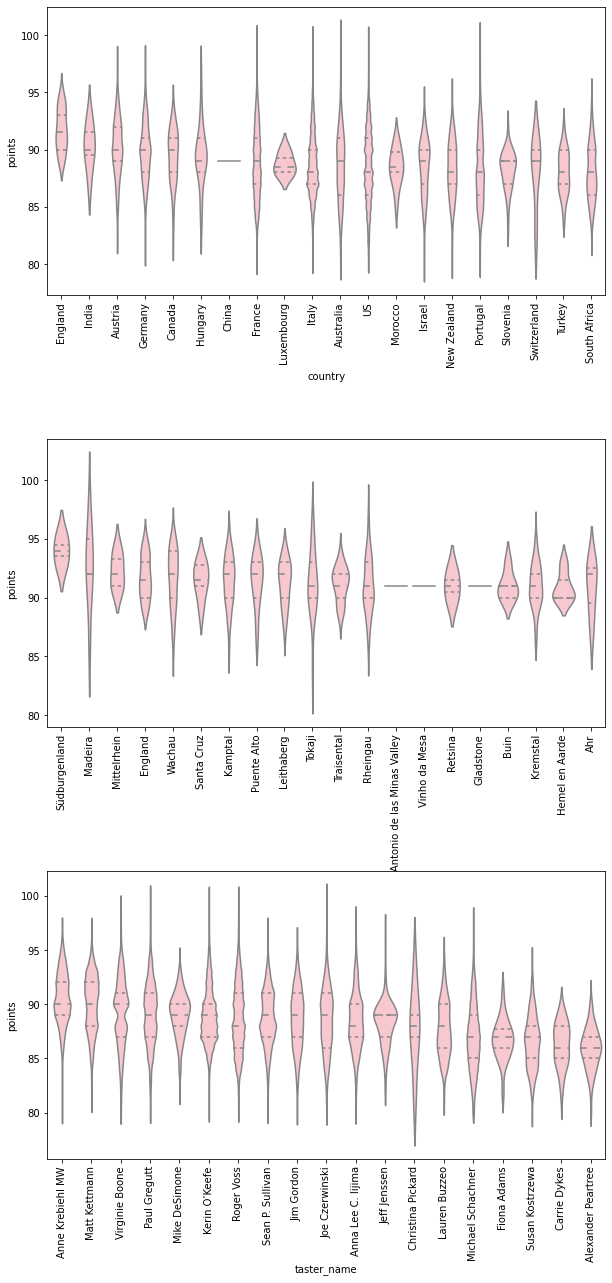

In [ ]:
num = 1
plt.figure(figsize=(10,20))
for col in ['country', 'province', 'taster_name']:
    plt.subplot(3, 1, num)
    violinplot_func(df, col, 'points', rotation=90, num=20)
    num += 1

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)


'낮은 점수에 대한 리스크 최소화'와 '기대 점수 최대화'라는 두가지 목적함수를 가지고 있는 문제로 해당 문제를 바라볼 수 있다. 위의 그래프는 평균 점수가 높은 순서대로 20개의 데이터를 뽑아 배열했기 때문에 후자의 경우는 왼쪽에 있는 순서대로 기대 점수를 최대화하는 카테고리에 해당한다고 볼 수 있다.

다만, 여기에서는 country와 province에서 두 개의 특징적인 카테고리가 확인된다. country에서는 England, province에서는 Sudburgenland인데, 두 카테고리는 기대 점수에 있어서도 가장 높은 값을 보이고 있고, 분산의 측면에서도 매우 작기 때문에 리스크를 최소화할 수 있을 것으로 보인다. 다만, 이 점이 country에서는 명확하게 확인되지만, province의 경우에는 Mittelrhein, Santa Cruz 등도 분산이나 skewed된 형태를 고려했을 때 매력적인 선택지로 보이므로 다른 변수까지 고려하여 선택할 수 있을 것이다.

taster name의 경우 사람마다 분포가 유사하게 형성되고, 평균의 차이도 다른 칼럼들에 비해 크게 드러나지 않기 때문에 우선 해석을 보류하고자 한다.

In [ ]:
df.groupby('designation').size().sort_values(ascending=False)

designation
Reserve                                  1541
Estate                                    976
Reserva                                   939
Riserva                                   488
Estate Grown                              455
                                         ... 
HMR Estate Vineyard                         1
HMR Estate Santa Lucia Highland Range       1
HM9 Helma und Marlies                       1
HJW Vineyard Dry                            1
“P”                                         1
Length: 32940, dtype: int64

In [ ]:
df.groupby('region_1').size().sort_values(ascending=False)

region_1
Portugal                           4323
Napa Valley                        3405
Chile                              3400
Columbia Valley (WA)               3088
Austria                            2447
                                   ... 
La Grande Rue                         1
Lamezia                               1
Langhorne Creek-Limestone Coast       1
Coda di Volpe d'Irpinia               1
Zonda Valley                          1
Length: 1222, dtype: int64

In [ ]:
df.groupby('variety').size().sort_values(ascending=False)

variety
Pinot Noir                  10032
Chardonnay                   8819
Cabernet Sauvignon           7134
Red Blend                    6658
Bordeaux-style Red Blend     5222
                            ...  
Syrah-Grenache-Viognier         1
Syrah-Malbec                    1
Malbec-Carménère                1
Madeleine Angevine              1
Žilavka                         1
Length: 670, dtype: int64

In [ ]:
df.groupby('winery').size().sort_values(ascending=False)

winery
Wines & Winemakers               173
DFJ Vinhos                       162
Testarossa                       161
Williams Selyem                  161
Louis Latour                     159
                                ... 
Château Metairie Neuve             1
Milo                               1
Château Mirefleurs                 1
Château Mission Saint Vincent      1
Château Haut-La-Péreyre            1
Length: 15664, dtype: int64

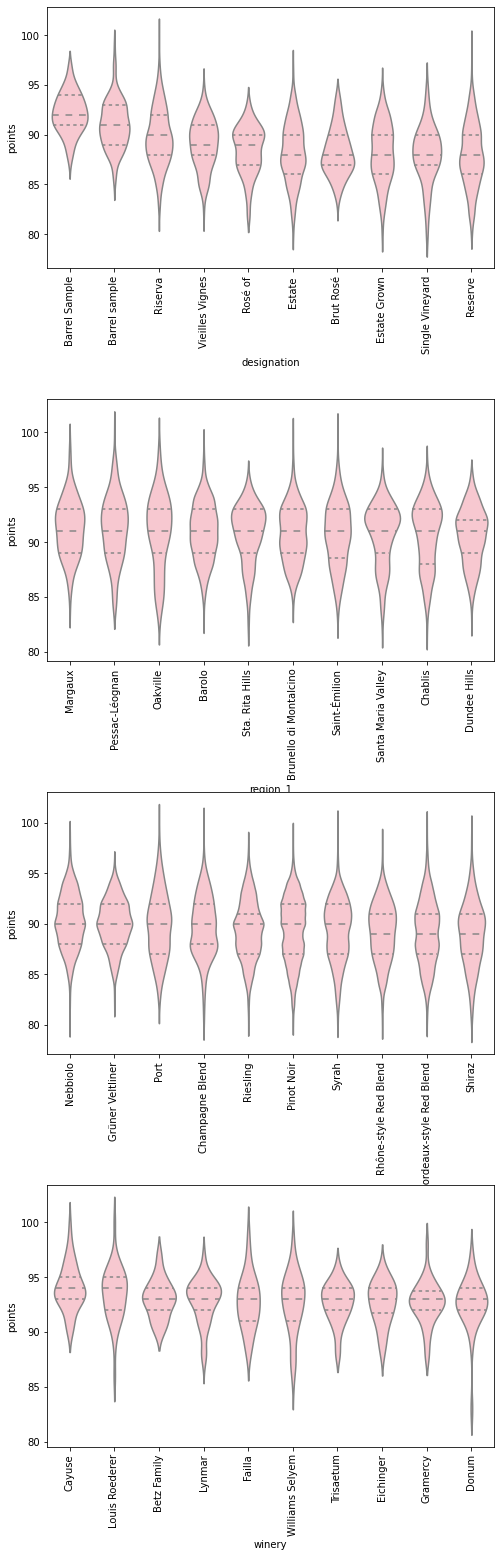

In [ ]:
num = 1
plt.figure(figsize=(8,25))
cut_nums = [100, 200, 500, 30]
for col in ['designation', 'region_1', 'variety', 'winery']:
    plt.subplot(4, 1, num)
    cut_num = cut_nums[num-1]
    index = df.groupby(col).mean().sort_values(by='points', ascending=False).index
    
    count = 0
    cols=[]
    group = df.groupby(col).size().sort_values(ascending=False)
    for idx in index:
        if group[idx] > cut_num:
            cols.append(idx)
            count += 1
        if count == 10:
            break
    sns.violinplot(data=df, x=col, y='points', order=cols, color='pink', inner='quartile')
    plt.xticks(rotation=90)
    
    num += 1

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)


같은 맥락에서 해석한다면, designation의 경우 Barrel Sample이 기댓값이 가장 높고 분산도 작게 형성되어 있기 때문에 가장 이상적인 선택이라 볼 수 있다. 그러나 region_1이나 variety의 경우 그룹 간의 차이가 크지도 않고, 분포 형태 또한 비슷하기 때문에 큰 영향 인자가 아닐 것으로 예상할 수 있다. winery의 경우 Cayuse가 다소 left-skewed 된 형태인 것을 제외하고는 좋은 선택지로 보이고, 그 외에는 Betz Family와 Gramercy가 긍정적으로 검토될 수 있을 것 같다. 다만 평균이 높더라도 Louis Roederer과 Donum, Williams Selyem은 피하는 것이 좋을 것으로 보인다.

In [ ]:
df.head(3)

,country,designation,price,province,region_1,taster_name,title,variety,winery,points
0,Australia,NaN,5.0,Australia Other,South Eastern Australia,Joe Czerwinski,Banrock Station 2006 Chardonnay (South Eastern...,Chardonnay,Banrock Station,83
1,France,Réserve,12.0,Rhône Valley,Côtes du Rhône,Roger Voss,Cellier des Dauphins 2015 Réserve Rosé (Côtes ...,Rosé,Cellier des Dauphins,85
2,Spain,Estate Grown & Bottled,9.0,Northern Spain,Rueda,Michael Schachner,Esperanza 2013 Estate Grown & Bottled Verdejo-...,Verdejo-Viura,Esperanza,86


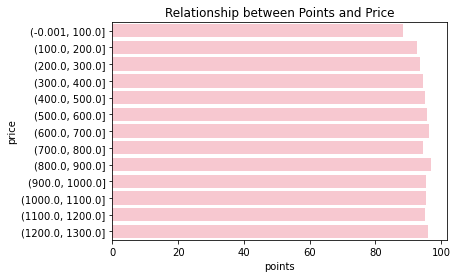

In [ ]:
bins = np.arange(0, 1400, 100)
price_group = pd.cut(df.price, bins=bins, include_lowest=True)
point_price = pd.concat([df.points, price_group], axis=1)
point_price_mean = point_price.groupby('price').mean().reset_index()

sns.barplot(data=point_price_mean, y='price', x='points', color='pink')
plt.title("Relationship between Points and Price");

Text(0, 0.5, 'points')

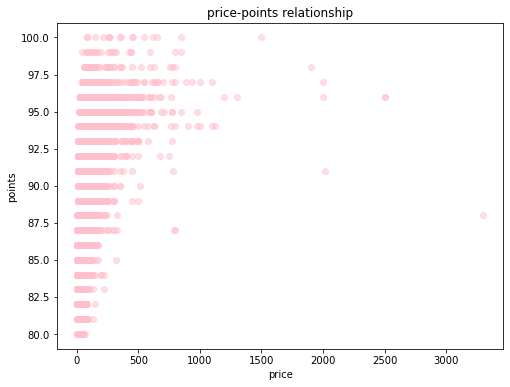

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(data=df, x='price', y='points', alpha=0.5, color='pink');
plt.title('price-points relationship')
plt.xlabel('price')
plt.ylabel('points')

여기에서 확인되는 특징적인 점은 price가 약 700정도 까지는 점수의 기댓값이 상승하는 것을 볼 수 있으나, 그 이후 약 1300까지의 점수대에서는 변화가 거의 없다. 그리고 scatter plot을 확인해보았을 때 그것보다 높은 점수대로 올라가게 되면 points가 급격하게 낮아지는 것을 확인할 수 있다. 하지만 높은 점수대에 대해 충분한 양의 데이터가 확보된 것은 아니므로 일반화하기 전에 고려가 필요하다.

### 데이터 중간점검

In [ ]:
len(df.winery.unique())

15735

In [ ]:
df[df.country == 'England']

,country,designation,price,province,region_1,taster_name,title,variety,winery,points
1116,England,Rosé Bella,85.0,England,England,Anne Krebiehl MW,Bride Valley Vineyard 2014 Rosé Bella Sparklin...,Sparkling Blend,Bride Valley Vineyard,94
1446,England,Classic Cuvée,50.0,England,England,Anne Krebiehl MW,Hoffmann & Rathbone 2013 Classic Cuvée Sparkli...,Sparkling Blend,Hoffmann & Rathbone,91
4442,England,Brut,50.0,England,England,Anne Krebiehl MW,Camel Valley 2012 Brut Sparkling (England),Sparkling Blend,Camel Valley,89
7308,England,Cuvée Brut,40.0,England,England,Anne Krebiehl MW,Wiston Estate Winery 2010 Cuvée Brut Sparkling...,Sparkling Blend,Wiston Estate Winery,91
7948,England,Fitzrovia Rosé,42.0,England,England,Anne Krebiehl MW,Ridgeview Estate 2013 Fitzrovia Rosé Sparkling...,Sparkling Blend,Ridgeview Estate,89
10822,England,Blanc de Noir,95.0,England,England,Anne Krebiehl MW,Jenkyn Place Vineyard 2010 Blanc de Noir Spark...,Sparkling Blend,Jenkyn Place Vineyard,90
15553,England,Blanc de Blancs,52.0,England,England,Anne Krebiehl MW,Bolney Wine Estate 2010 Blanc de Blancs Chardo...,Chardonnay,Bolney Wine Estate,91
16747,England,Blanc de Blancs,NaN,England,England,Anne Krebiehl MW,Bolney Wine Estate 2009 Blanc de Blancs Chardo...,Chardonnay,Bolney Wine Estate,94
28889,England,Bolney Bubbly,45.0,England,England,Anne Krebiehl MW,Bolney Wine Estate NV Bolney Bubbly White (Eng...,White Blend,Bolney Wine Estate,89
29750,England,Rosé,44.0,England,England,Anne Krebiehl MW,Wiston Estate Winery 2014 Rosé Sparkling (Engl...,Sparkling Blend,Wiston Estate Winery,94


In [ ]:
df[df.province == "Südburgenland"]

,country,designation,price,province,region_1,taster_name,title,variety,winery,points
3447,Austria,Perwolff,79.0,Südburgenland,Austria,Anne Krebiehl MW,Krutzler 2012 Perwolff Blaufränkisch (Südburge...,Blaufränkisch,Krutzler,95
45793,Austria,Steinberg,35.0,Südburgenland,Austria,Anne Krebiehl MW,Jalits 2012 Steinberg Red (Südburgenland),Red Blend,Jalits,93


In [ ]:
df[df.province == "Mittelrhein"]

,country,designation,price,province,region_1,taster_name,title,variety,winery,points
19153,Germany,Rheindiabas,26.0,Mittelrhein,Germany,Anna Lee C. Iijima,Matthias Müller 2012 Rheindiabas Riesling (Mit...,Riesling,Matthias Müller,93
21830,Germany,S Bopparder Hamm Feuerlay Trocken,29.0,Mittelrhein,Germany,Anna Lee C. Iijima,Matthias Müller 2012 S Bopparder Hamm Feuerlay...,Riesling,Matthias Müller,91
41096,Germany,Bacharacher Spätlese Feinherb,34.0,Mittelrhein,Germany,Anna Lee C. Iijima,Toni Jost 2011 Bacharacher Spätlese Feinherb R...,Riesling,Toni Jost,91
92655,Germany,Alte Reben Bopparder Hamm Feinherb,33.0,Mittelrhein,Germany,Anna Lee C. Iijima,Matthias Müller 2012 Alte Reben Bopparder Hamm...,Riesling,Matthias Müller,94


In [ ]:
df[df.province == "Santa Cruz"]

,country,designation,price,province,region_1,taster_name,title,variety,winery,points
1353,Chile,Camel Hill,45.0,Santa Cruz,Chile,Matt Kettmann,Left Bend 2011 Camel Hill Cabernet Sauvignon (...,Cabernet Sauvignon,Left Bend,89
12652,Chile,Alpha M,100.0,Santa Cruz,Chile,Michael Schachner,Montes 2009 Alpha M Red (Santa Cruz),Bordeaux-style Red Blend,Montes,93
13914,Chile,Folly,95.0,Santa Cruz,Chile,Michael Schachner,Montes 2006 Folly Syrah (Santa Cruz),Syrah,Montes,93
32623,Chile,Caballo Loco Grand Cru Apalta,35.0,Santa Cruz,Chile,Michael Schachner,Valdivieso 2013 Caballo Loco Grand Cru Apalta ...,Red Blend,Valdivieso,91
62362,Chile,Alpha M,95.0,Santa Cruz,Chile,Michael Schachner,Montes 2006 Alpha M Red (Santa Cruz),Bordeaux-style Red Blend,Montes,92
82235,Chile,Alpha M,95.0,Santa Cruz,Chile,Michael Schachner,Montes 2007 Alpha M Red (Santa Cruz),Bordeaux-style Red Blend,Montes,91


In [ ]:
df[df.designation == "Barrel Sample"]

,country,designation,price,province,region_1,taster_name,title,variety,winery,points
639,France,Barrel Sample,NaN,Bordeaux,Barsac,Roger Voss,Château Nairac 2011 Barrel Sample (Barsac),Bordeaux-style White Blend,Château Nairac,93
2153,France,Barrel Sample,NaN,Bordeaux,Saint-Estèphe,Roger Voss,Château Montrose 2012 Barrel Sample (Saint-Es...,Bordeaux-style Red Blend,Château Montrose,95
2733,France,Barrel Sample,NaN,Bordeaux,Saint-Émilion,Roger Voss,Château Péby Faugères 2011 Barrel Sample (Sai...,Bordeaux-style Red Blend,Château Péby Faugères,90
3256,France,Barrel Sample,NaN,Bordeaux,Saint-Émilion,Roger Voss,Château Villemaurine 2012 Barrel Sample (Sain...,Bordeaux-style Red Blend,Château Villemaurine,93
4411,France,Barrel Sample,NaN,Bordeaux,Margaux,Roger Voss,Château du Tertre 2012 Barrel Sample (Margaux),Bordeaux-style Red Blend,Château du Tertre,92
...,...,...,...,...,...,...,...,...,...,...
101868,France,Barrel Sample,NaN,Bordeaux,Saint-Estèphe,Roger Voss,Château Haut-Marbuzet 2011 Barrel Sample (Sai...,Bordeaux-style Red Blend,Château Haut-Marbuzet,91
102029,France,Barrel Sample,NaN,Bordeaux,Pessac-Léognan,Roger Voss,Château Haut-Brion 2012 Barrel Sample (Pessac...,Bordeaux-style White Blend,Château Haut-Brion,95
102097,France,Barrel Sample,NaN,Bordeaux,Graves,Roger Voss,Château Ferrande 2012 Barrel Sample (Graves),Bordeaux-style Red Blend,Château Ferrande,91
102459,France,Barrel Sample,NaN,Bordeaux,Saint-Estèphe,Roger Voss,Château de Pez 2012 Barrel Sample (Saint-Estè...,Bordeaux-style Red Blend,Château de Pez,93


In [ ]:
df[df.winery == "Cayuse"]

,country,designation,price,province,region_1,taster_name,title,variety,winery,points
670,US,Armada Vineyard,95.0,Washington,Walla Walla Valley (WA),Sean P. Sullivan,Cayuse 2013 Armada Vineyard Syrah (Walla Walla...,Syrah,Cayuse,94
878,US,Flying Pig,85.0,Washington,Walla Walla Valley (WA),Paul Gregutt,Cayuse 2010 Flying Pig Red (Walla Walla Valley...,Bordeaux-style Red Blend,Cayuse,95
947,US,En Cerise Vineyard,75.0,Oregon,Walla Walla Valley (OR),Paul Gregutt,Cayuse 2011 En Cerise Vineyard Syrah (Walla Wa...,Syrah,Cayuse,98
1306,US,Cailloux Vineyard,70.0,Washington,Walla Walla Valley (WA),Sean P. Sullivan,Cayuse 2013 Cailloux Vineyard Viognier (Walla ...,Viognier,Cayuse,90
2276,US,God Only Knows,97.0,Oregon,Walla Walla Valley (OR),Sean P. Sullivan,Cayuse 2014 God Only Knows Red (Walla Walla Va...,Red Blend,Cayuse,93
...,...,...,...,...,...,...,...,...,...,...
92837,US,Edith Rosé Armada Vineyard,50.0,Washington,Walla Walla Valley (WA),Sean P. Sullivan,Cayuse 2014 Edith Rosé Armada Vineyard Grenach...,Grenache,Cayuse,91
98235,US,En Chamberlain Vineyard,75.0,Washington,Walla Walla Valley (WA),Sean P. Sullivan,Cayuse 2012 En Chamberlain Vineyard Syrah (Wal...,Syrah,Cayuse,95
99513,US,Armada Vineyard,97.0,Oregon,Walla Walla Valley (OR),Sean P. Sullivan,Cayuse 2014 Armada Vineyard Syrah (Walla Walla...,Syrah,Cayuse,93
100539,US,Wallah Wallah Special #4,165.0,Washington,Walla Walla Valley (WA),Sean P. Sullivan,Cayuse 2012 Wallah Wallah Special #4 Syrah (Wa...,Syrah,Cayuse,94


In [ ]:
df[df.winery == "Betz Family"]

,country,designation,price,province,region_1,taster_name,title,variety,winery,points
9915,US,Cuvée Frangin,35.0,Washington,Columbia Valley (WA),Sean P. Sullivan,Betz Family 2013 Cuvée Frangin Red (Columbia V...,Red Blend,Betz Family,90
9940,US,Clos de Betz Red Wine,45.0,Washington,Columbia Valley (WA),Paul Gregutt,Betz Family 2007 Clos de Betz Red Wine Red (Co...,Red Blend,Betz Family,93
12371,US,La Serenne,55.0,Washington,Yakima Valley,Paul Gregutt,Betz Family 2007 La Serenne Syrah (Yakima Valley),Syrah,Betz Family,94
22084,US,Père de Famille,75.0,Washington,Columbia Valley (WA),Sean P. Sullivan,Betz Family 2013 Père de Famille Cabernet Sauv...,Cabernet Sauvignon,Betz Family,91
22348,US,La Côte Rousse,60.0,Washington,Red Mountain,Sean P. Sullivan,Betz Family 2014 La Côte Rousse Syrah (Red Mou...,Syrah,Betz Family,94
22812,US,La Serenne,55.0,Washington,Yakima Valley,Paul Gregutt,Betz Family 2011 La Serenne Syrah (Yakima Valley),Syrah,Betz Family,91
23952,US,Heart of the Hill,110.0,Washington,Red Mountain,Sean P. Sullivan,Betz Family 2014 Heart of the Hill Cabernet Sa...,Cabernet Sauvignon,Betz Family,93
25872,US,La Côte Rousse,55.0,Washington,Red Mountain,Paul Gregutt,Betz Family 2010 La Côte Rousse Syrah (Red Mou...,Syrah,Betz Family,93
26544,US,Père de Famille,75.0,Washington,Columbia Valley (WA),Sean P. Sullivan,Betz Family 2014 Père de Famille Cabernet Sauv...,Cabernet Sauvignon,Betz Family,93
30757,US,La Serenne,55.0,Washington,Yakima Valley,Sean P. Sullivan,Betz Family 2012 La Serenne Syrah (Yakima Valley),Syrah,Betz Family,93


In [ ]:
df[df.winery == "Gramercy"]

,country,designation,price,province,region_1,taster_name,title,variety,winery,points
1082,US,Lagniappe,45.0,Washington,Columbia Valley (WA),Paul Gregutt,Gramercy 2008 Lagniappe Syrah (Columbia Valley...,Syrah,Gramercy,93
2156,US,L'Idiot du Village,42.0,Washington,Columbia Valley (WA),Sean P. Sullivan,Gramercy 2012 L'Idiot du Village Mourvèdre (Co...,Mourvèdre,Gramercy,93
8414,US,Lower East,28.0,Washington,Columbia Valley (WA),Sean P. Sullivan,Gramercy 2013 Lower East Cabernet Sauvignon (C...,Cabernet Sauvignon,Gramercy,92
9128,US,The Third Man Red,45.0,Washington,Columbia Valley (WA),Paul Gregutt,Gramercy 2009 The Third Man Red Red (Columbia ...,Rhône-style Red Blend,Gramercy,94
11510,US,Lower East,28.0,Washington,Columbia Valley (WA),Sean P. Sullivan,Gramercy 2013 Lower East Syrah (Columbia Valle...,Syrah,Gramercy,93
11567,US,L'Idiot du Village,42.0,Washington,Columbia Valley (WA),Sean P. Sullivan,Gramercy 2013 L'Idiot du Village Mourvèdre (Co...,Mourvèdre,Gramercy,92
13759,US,NaN,50.0,Washington,Columbia Valley (WA),Sean P. Sullivan,Gramercy 2013 Cabernet Sauvignon (Columbia Val...,Cabernet Sauvignon,Gramercy,92
15389,US,NaN,42.0,Washington,Columbia Valley (WA),Paul Gregutt,Gramercy 2006 Cabernet Sauvignon (Columbia Val...,Cabernet Sauvignon,Gramercy,94
16210,US,Forgotten Hills Vineyard,60.0,Washington,Walla Walla Valley (WA),Sean P. Sullivan,Gramercy 2014 Forgotten Hills Vineyard Syrah (...,Syrah,Gramercy,92
19085,US,The Deuce,54.0,Washington,Walla Walla Valley (WA),Sean P. Sullivan,Gramercy 2013 The Deuce Syrah (Walla Walla Val...,Syrah,Gramercy,93


위의 데이터 확인 작업은 앞에서 시각화를 통해 확인했던 price와 의미가 있어보이는 데이터를 직접 확인해보고, 의미있는 인사이트를 발견하고자 하였다. 위의 데이터셋은 두가지에 집중하여 관찰해보았다.

1) 지정한 칼럼 이외의 칼럼에 공통적인 값이 있는지 확인해보고, 만약 있다면 이를 기준으로 다시 시각화 진행

2) 해당하는 칼럼의 수가 과도하게 적다면 해당하는 정보의 신뢰도가 높지 않으므로 체크

우선, province의 변수들이 초기에는 카테고리별 분산 및 기댓값의 차이가 크다고 판단하여 의미 있는 변수로 체크해두었지만, 실제로 각 카테고리에 해당하는 변수 개수가 적어서 발생한 것으로 판단된다. 따라서 province 변수 자체를 분석 대상에서 우선 제외하였다.

그리고 1)의 경우 다음과 같이 세 가지 변수에 대해 분석해보았다.
- **country = England**: taster가 모두 동일하고, variety가 Sparkling Blend에 집중
- **designation = Barrel Sample**: taster가 모두 동일하고, variety가 동일, 모두 France산
- **winery = Cayuse/Betz Family/Gramercy**: country가 모두 US로 동일하고, region_1이 유사, taster가 두명으로 축소되고, Variety가 "Syrah"에 집중

### Taster, Variety, Country/Region_1 영향 확인

In [ ]:
df.points.describe()

count    97162.000000
mean        88.447860
std          3.084275
min         80.000000
25%         86.000000
50%         88.000000
75%         91.000000
max        100.000000
Name: points, dtype: float64

In [ ]:
taster = ['Anne Krebiehl\xa0MW', 'Roger Voss', 'Sean P. Sullivan', 'Paul Gregutt']

taster_points_mean = df.query(f'taster_name in {taster}').groupby('taster_name').mean().points
taster_points_mean

taster_name
Anne Krebiehl MW    90.597981
Paul Gregutt        89.084312
Roger Voss          88.737077
Sean P. Sullivan    88.724422
Name: points, dtype: float64

위의 통계값과 앞서 그린 violinplot에 근거하면 네 명의 taster가 평균적으로 높은 점수를 부여하는 taster에 해당된다. 하지만, Paul Gregutt나 Roger Voss는 상당히 큰 분산을 가지고 점수를 부여하는 taster에 해당되었고, taster 간의 차이가 크게 나타나지는 않음을 고려할 필요가 있다.

In [ ]:
variety = ['Sparkling Blend', 'Syrah', 'Bordeaux-style White Blend', 'Bordeaux-style Red Blend']

variety_points_mean = df.query(f'variety in {variety}').groupby('variety').mean().points
variety_points_mean

variety
Bordeaux-style Red Blend      89.140176
Bordeaux-style White Blend    88.702864
Sparkling Blend               87.993129
Syrah                         89.318502
Name: points, dtype: float64

Sparkling Blend는 점수의 기댓값이 평균 이하에 해당하고, 나머지의 경우 Q3에 가까운 평균값을 보이고 있다. 다시 위의 Scatterplot을 고려해보면, variety 역시 카테고리 간의 차이가 명확하게 보이지는 않았지만 분산이 유사하다는 가정 하에 Syrah를 선택하는 것이 형태를 고려했을 때 긍정적으로 생각될 수 있다.

In [ ]:
df.query('country == "US"').groupby(['region_1', 'winery']).size().reset_index(name='count').sort_values(by='count', ascending=False).iloc[:50, :]

,region_1,winery,count
2016,Columbia Valley (WA),Chateau Ste. Michelle,119
6645,Russian River Valley,Williams Selyem,94
6348,Russian River Valley,Gary Farrell,84
6436,Russian River Valley,Lynmar,76
2328,Columbia Valley (WA),Waterbrook,72
8439,Sonoma Valley,Kunde,71
2941,Finger Lakes,Lamoreaux Landing,70
7292,Santa Lucia Highlands,Testarossa,69
7648,Sierra Foothills,Naggiar,69
3013,Green Valley,Iron Horse,67


위의 분석에 따르면, winery가 Cayuse인 것을 분석했을 때에 전부 country는 US, Region_1이 유사한 특징을 보였다. 그러나 반대로 US 데이터에 대하여 확인해보면 winery=Cayuse나 자주 등장하는 region_1이 인기있는 선택지가 아닌 것을 볼 수 있다.

In [ ]:
# 추가 분석
df.query('variety == "Sparkling Blend"').groupby('country').mean().sort_values(ascending=False, by='points')

,price,points
country,,
England,53.580645,91.500000
Austria,30.371429,89.342857
US,36.465116,88.947674
Italy,41.014851,88.587302
Luxembourg,28.000000,88.500000
Germany,24.555556,87.777778
France,22.717131,87.768421
Portugal,25.000000,87.666667
New Zealand,25.125000,87.625000


In [ ]:
df.query('variety == "Sparkling Blend"').groupby('country').size().sort_values(ascending=False)

country
US              516
Spain           367
France          285
Italy           252
Austria          35
England          32
Australia        28
Argentina        21
Chile            11
South Africa     10
Germany           9
New Zealand       8
Portugal          6
Ukraine           6
Brazil            6
Luxembourg        2
Georgia           2
Israel            2
Moldova           1
Peru              1
Hungary           1
dtype: int64

In [ ]:
df.query('taster_name == "Anne Krebiehl\xa0MW"').groupby('country').mean()

,price,points
country,,
Austria,31.247357,90.649375
England,53.875000,91.740000
France,31.431294,90.461914


따라서 위에서 발견된 인사이트를 정리하자면 다음과 같다.

- **winery: Cayuse, variety: Syrah**: 모두 US 제품으로 taster의 경우 Sean P. Sullivan, Paul Gregutt의 두 명한테 평가를 받는다. 이때, Paul Gregutt의 경우 점수의 편차가 다소 있는 taster이기 때문에 리스크가 조금 있을 것으로 생각된다. 여기에서 variety라는 변수는 사실 카테고리 간의 편차나 분포의 차이가 크게 확인되지 않는 변수이지만, Syrah는 조금 눈여겨볼만한 것으로 생각된다. 왜냐하면 유사한 분포들 사이에서 다소 리스크가 적은 편이고, right-skewed되어 있으며, Cayuse winery와 결합되었을 때 좋은 점수를 보이고 있기 때문에 긍정적인 선택지일 것으로 보인다. 더불어, US 내에서는 Cayuse winery와 해당되는 region_1이 매우 인기있는 선택지가 아닌데, 이 변수들이 모두 결합되었을 때 시너지를 생각한다면 US가 다소 위험 부담이 큰(분산이 큰) country 선택지임에도 긍정적으로 고려할 수 있을 것으로 보인다.

- **country: England, variety:Sparkling Blend** : 영국에서 제조된 와인은 모두 Anne Krebiehl MW라는 taster로부터 평가를 받는데, 전반적으로 점수를 좋게 주는 taster이기도 하지만, 평가하는 Austria, France, England 세 개 국가 중 영국에 대한 점수를 가장 긍정적으로 주고 있다. 따라서 와인에 대한 좋은 평가를 받기에 유리하다. 더불어, Sparkling Blend라는 variety가 점수에 있어서 평균 이하의 기댓값을 받고 있지만, 영국의 와인과 결합되었을 때 상당히 좋은 평가를 받고 있다. 실제로 영국만을 기준으로 보았을 때에는 91.5점을 평균 점수로 받고 있기 때문에 좋은 선택지로 고려할 수 있다.

- **designation: Barrel Sample**: 모두 동일한 taster인 Roger Voss로부터 평가를 받고 있는데, 다소 점수의 편차가 큰 taster라 리스크를 감수해야 하는 부분이 있다. 또한 variety 역시 무난한 점수대를 받고 있는 Bordeaux-style White Blend, Bordeaux-style Red Blend이지만 눈에 띄는 장점이 포착되지는 않는다.더불어, 모두 country 변수가 프랑스에 해당하는데, 프랑스라는 국가의 와인이 매우 불규칙한 퍼포먼스를 보이고 있어서 권장하지 않는다.

<AxesSubplot:xlabel='price', ylabel='points'>

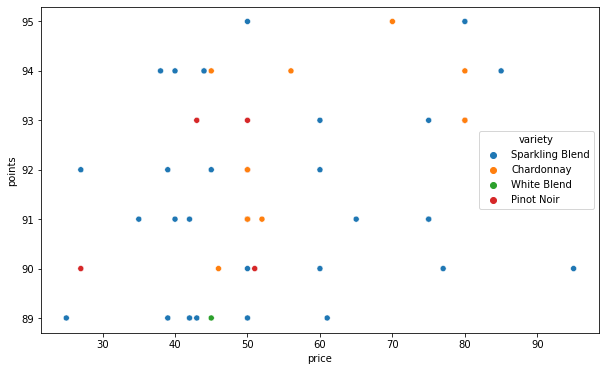

In [ ]:
England_df = df.query('country == "England"')
plt.figure(figsize=(10,6))
sns.scatterplot(data=England_df, x='price', y='points', hue='variety')

In [ ]:
Cayuse_df = df.query('winery == "Cayuse"')

Cayuse_df = Cayuse_df.groupby(['region_1', 'variety']).size().reset_index(name='count').pivot(index='region_1', columns='variety', values='count')
Cayuse_df.fillna(0, inplace=True)

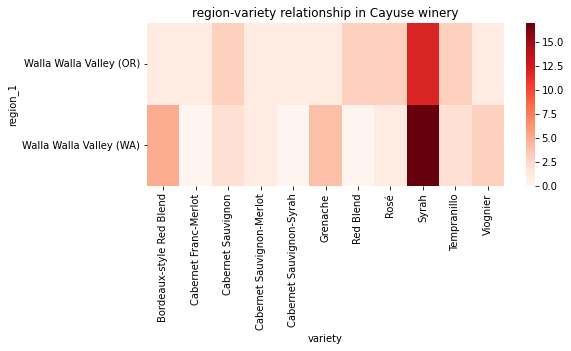

In [ ]:
plt.figure(figsize=(8,3))
sns.heatmap(Cayuse_df, cmap='Reds')
plt.title('region-variety relationship in Cayuse winery');

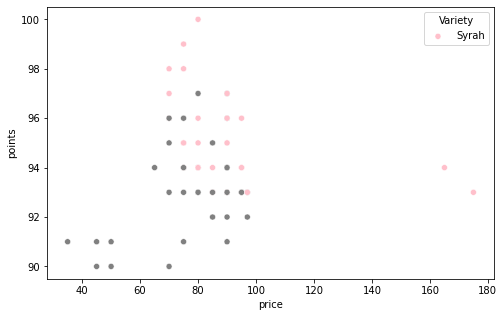

In [ ]:
plt.figure(figsize=(8,5))
Cayuse_df = df.query('winery == "Cayuse"')
color = ['Pink'] + ['gray']*10
sns.scatterplot(data=Cayuse_df, x='price', y='points', hue='variety', palette=color)
plt.legend(['Syrah'], title='Variety');